# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# %matplotlib inline (the code to the left may help with displaying plots)

# Reading Files

### Reading a CSV into a DataFrame (Pandas)

In [2]:
df_u = pd.read_csv('unrate.csv')
df_u.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


### Reading a CSV and converting to a list of lists (CSV)

In [3]:
import csv
file_u = open('unrate.csv')
text_u = csv.reader(file_u)
list_u = list(text_u)
list_u[0:5]

[['DATE', 'VALUE'],
 ['1948-01-01', '3.4'],
 ['1948-02-01', '3.8'],
 ['1948-03-01', '4.0'],
 ['1948-04-01', '3.9']]

### Reading a CSV and converting to a list of lists (no modules)

In [4]:
file_1 = open('unrate.csv', 'r')
text_1 = file_1.read()
list_1 = text_1.split('\n')
list_1[0:5]

list_2 = []
for x in list_1:
    y = []
    x.split(',')
    y.append(x)
    list_2.append(y)
    
list_2[0:5]

[['DATE,VALUE'],
 ['1948-01-01,3.4'],
 ['1948-02-01,3.8'],
 ['1948-03-01,4.0'],
 ['1948-04-01,3.9']]

### Reading Excel file (xlsx) to a DataFrame

In [5]:
df_bd = pd.read_excel('big data.xlsx',
                      sheetname = 'big data',   # Name of sheet in the excel file
                      skiprows = [1],           # Rows not to read
                      header = 1                # 1 means the file already has a heading (use it), 0 otherwise.
                      )

df_bd.head()

,Week,big data: (Worldwide)
0,2012-04-01,26
1,2012-04-08,23
2,2012-04-15,23
3,2012-04-22,26
4,2012-04-29,25


### Creating a DataFrame

In [43]:
raw_data = {'officer_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'jan_arrests': [4, 24, 31, 2, 3],
        'feb_arrests': [25, 94, 57, 62, 70],
        'march_arrests': [5, 43, 23, 23, 51]}
df1 = pd.DataFrame(raw_data, columns = ['officer_name', 'jan_arrests', 'feb_arrests', 'march_arrests'])
df1

,officer_name,jan_arrests,feb_arrests,march_arrests
0,Jason,4,25,5
1,Molly,24,94,43
2,Tina,31,57,23
3,Jake,2,62,23
4,Amy,3,70,51


In [44]:
raw_data = {'officer_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'jan_arrests': [6, 26, 33, 3, 4],
        'feb_arrests': [21, 90, 57, 62, 50],
        'march_arrests': [15, 53, 33, 13, 41]}
df2 = pd.DataFrame(raw_data, columns = ['officer_name', 'jan_arrests', 'feb_arrests', 'march_arrests'])
df2

,officer_name,jan_arrests,feb_arrests,march_arrests
0,Jason,6,21,15
1,Molly,26,90,53
2,Tina,33,57,33
3,Jake,3,62,13
4,Amy,4,50,41


# Organising Dataframes

### Replace Values in a list with a different value

In [1]:
# this function will replace the string 'before' with srting 'after' in a list 'alist'
def replace_value(alist, before, after):
    new_list=[]
    for x in alist:
        if x == before:
            new_list.append(after)
        else:
            new_list.append(x)
    return new_list

### Replacing Values in a Dataframe with Nan

In [5]:
#create dataframe
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'],
        'age': [42, 52, 36, 24, 73],
        'preTestScore': [-999, -999, -999, 2, 1],
        'postTestScore': [2, 2, -999, 2, -999]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df


# -999 is the number you want to get rid of
df.replace(-999, np.nan)

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,NaN,2.0
1,Molly,Jacobson,52,NaN,2.0
2,Tina,Ali,36,NaN,NaN
3,Jake,Milner,24,2.0,2.0
4,Amy,Cooze,73,1.0,NaN


### Converting a Date string column to Datetime column

In [6]:
df_u['DATE'] = pd.to_datetime(df_u['DATE'])
df_u.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


### Reindexing a DataFrame object

In [7]:
df_u2 = df_u.set_index('DATE')
df_u2.head()

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


### Adding a column

In [8]:
# DataFrame.insert(loc, column, value, allow_duplicates=False)

indexa = df_u['DATE'].tolist()
indexa = [x.year for x in indexa]

df_u2.insert(0, column='year', value=indexa)  # this is the line that does it
df_u2.head()

,year,VALUE
DATE,,
1948-01-01,1948,3.4
1948-02-01,1948,3.8
1948-03-01,1948,4.0
1948-04-01,1948,3.9
1948-05-01,1948,3.5


### Making a Series Object from a Column

In [9]:
s_values = df_u2['VALUE']
s_values.head()

DATE
1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
Name: VALUE, dtype: float64

### Making a List from a DataFrame (or Series Object)

In [10]:
# Using DataFrame Column
l_values = df_u2['VALUE'].tolist()
l_values[0:10]

[3.4, 3.8, 4.0, 3.9, 3.5, 3.6, 3.6, 3.9, 3.8, 3.7]

In [11]:
# Using Series Object
l_values2 = s_values.tolist()
l_values2[0:10]

[3.4, 3.8, 4.0, 3.9, 3.5, 3.6, 3.6, 3.9, 3.8, 3.7]

### Combining DataFrame's

In [45]:
pd.concat([df1, df2], axis='columns')

,officer_name,jan_arrests,feb_arrests,march_arrests,officer_name,jan_arrests,feb_arrests,march_arrests
0,Jason,4,25,5,Jason,6,21,15
1,Molly,24,94,43,Molly,26,90,53
2,Tina,31,57,23,Tina,33,57,33
3,Jake,2,62,23,Jake,3,62,13
4,Amy,3,70,51,Amy,4,50,41


In [46]:
df3 = pd.concat([df, df2], axis='index')
df3

,officer_name,jan_arrests,feb_arrests,march_arrests
0,Jason,4,25,5
1,Molly,24,94,43
2,Tina,31,57,23
3,Jake,2,62,23
4,Amy,3,70,51
0,Jason,6,21,15
1,Molly,26,90,53
2,Tina,33,57,33
3,Jake,3,62,13
4,Amy,4,50,41


# Analysing Data

### Group a DataFrame by a category within a column and then calculate the categories mean

In [47]:
df3

,officer_name,jan_arrests,feb_arrests,march_arrests
0,Jason,4,25,5
1,Molly,24,94,43
2,Tina,31,57,23
3,Jake,2,62,23
4,Amy,3,70,51
0,Jason,6,21,15
1,Molly,26,90,53
2,Tina,33,57,33
3,Jake,3,62,13
4,Amy,4,50,41


In [41]:
df3.groupby('officer_name').agg(np.mean)

,jan_arrests,feb_arrests,march_arrests
officer_name,,,
Amy,3.5,60.0,46.0
Jake,2.5,62.0,18.0
Jason,5.0,23.0,10.0
Molly,25.0,92.0,48.0
Tina,32.0,57.0,28.0


### Data Summary (mean, median, min, max, std, count, quartiles)

In [12]:
df_u.describe()

,VALUE
count,824.000000
mean,5.815413
std,1.639627
min,2.500000
25%,4.700000
50%,5.600000
75%,6.900000
max,10.800000


### Pivot tables - Example 1

In [13]:
x= pd.pivot_table(
    df_u2,              # DataFrame object
    index = 'year',     # The category you want to find the sum or mean of (or other)
    values='VALUE',     # Values for the category
    aggfunc=np.mean     # the function you want to apply to the values in the category
    )

x.head()

year
1948    3.750000
1949    6.050000
1950    5.208333
1951    3.283333
1952    3.025000
Name: VALUE, dtype: float64

### Pivot Tables - Example 2

In [14]:
df_all_ages = pd.read_csv('all-ages2.csv')
df_aa = df_all_ages
df_aa.head(2)

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0


In [15]:
pt_aa = df_aa.pivot_table(index="Major_category", values="Total", aggfunc=np.sum)
pt_aa.head()

Major_category
Agriculture & Natural Resources     632437
Arts                               1805865
Biology & Life Science             1338186
Business                           9858741
Communications & Journalism        1803822
Name: Total, dtype: int64

# Plotting

### Scatter Plots

In [16]:
df_u2.head(2)

,year,VALUE
DATE,,
1948-01-01,1948,3.4
1948-02-01,1948,3.8


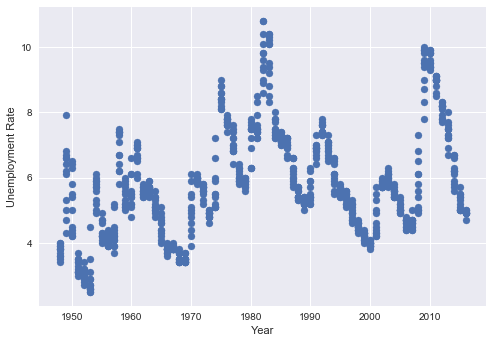

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x_list = df_u2['year']
y_list = df_u2['VALUE']

ax.scatter( x_list, y_list )
ax.set_xlabel( 'Year' )
ax.set_ylabel( 'Unemployment Rate' )

plt.show()

### Line Plots

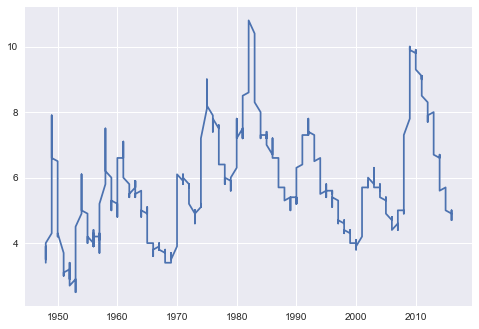

In [18]:
plt.plot(df_u2['year'],df_u2['VALUE'])
plt.show()

### Bar Plots - Vertical - Example 1

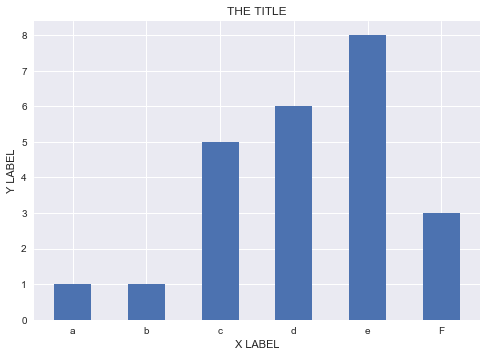

In [19]:
# PLOT PARAMETER OBJECTS
bar_p_l = [0,1,2,3,4,5]                   # positions of bars list
bar_h_l = [1,1,5,6,8,3]                   # Heights of bars list
bar_w_v = 0.5                             # bar width number saved as a variable
tick_p_l = [0,1,2,3,4,5]                  # Positions of ticks list
tick_l_l = ['a', 'b', 'c', 'd', 'e', 'F'] # Lables for x ticks

# MAKING THE PLOT
fig, ax = plt.subplots()               # creates a figure(fig) and axis(ax), these can be any string.
ax.bar( bar_p_l, bar_h_l, bar_w_v )    # tells python you are creating a bar chart with the given arguements
ax.set_xticks(tick_p_l)                # Set's the positions of ticks
ax.set_xticklabels(tick_l_l)           # Set's the labels for the ticks
ax.set_title('THE TITLE')                 # label title 
ax.set_xlabel('X LABEL')                  # label x axis
ax.set_ylabel('Y LABEL')                  # balel y axis
plt.show()                             # tells python you want to show the bar chart

### Bar Plots - Vertical - Example 2

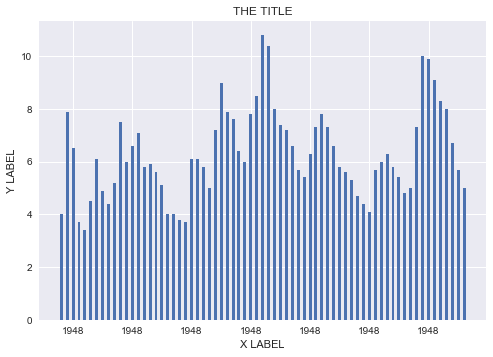

In [20]:
# PLOT PARAMETER OBJECTS

bar_w_v = 0.5                             # bar width number saved as a variable
tick_l_l = df_u2['year']                  # Lables for x ticks

# MAKING THE PLOT
fig, ax = plt.subplots()               # creates a figure(fig) and axis(ax), these can be any string.
ax.bar( df_u2['year'], df_u2['VALUE'], bar_w_v )    # tells python you are creating a bar chart with the given arguements
# ax.set_xticks(tick_p_l)                # Set's the positions of ticks
ax.set_xticklabels(tick_l_l)           # Set's the labels for the ticks
ax.set_title('THE TITLE')                 # label title 
ax.set_xlabel('X LABEL')                  # label x axis
ax.set_ylabel('Y LABEL')                  # balel y axis
plt.show()                             # tells python you want to show the bar chart

### Bar Plots - Vertical - Example 3 (quick method) less customization

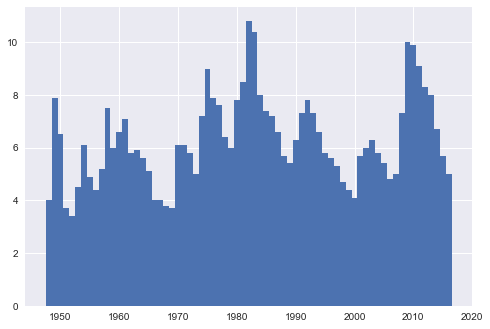

In [21]:
plt.bar(df_u2['year'], df_u2['VALUE'], 1)
plt.show()

### BAR PLOTS (HORIZONTAL)

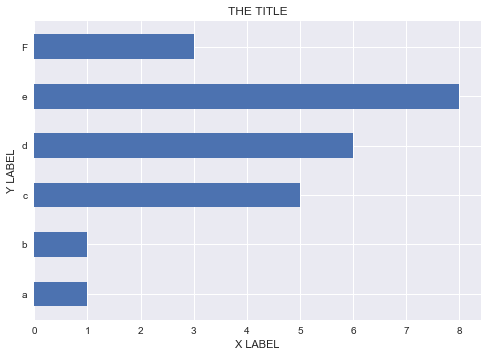

In [22]:
# PLOT PARAMETER OBJECTS
bar_p_l = [0,1,2,3,4,5]                   # positions of bars list
bar_h_l = [1,1,5,6,8,3]                   # Heights of bars list
bar_w_v = 0.5                             # bar width number saved as a variable
tick_p_l = [0,1,2,3,4,5]                  # Positions of ticks list
tick_l_l = ['a', 'b', 'c', 'd', 'e', 'F'] # Lables for x ticks

# MAKING THE PLOT
fig1, ax1 = plt.subplots()               # creates a figure(fig) and axis(ax), these can be any string.
ax1.barh( bar_p_l, bar_h_l, bar_w_v )    # tells python you are creating a bar chart with the given arguements
ax1.set_yticks(tick_p_l)                 # Set's the positions of ticks
ax1.set_yticklabels(tick_l_l)            # Set's the labels for the ticks
ax1.set_title('THE TITLE')                   # label title 
ax1.set_xlabel('X LABEL')                    # label x axis
ax1.set_ylabel('Y LABEL')                    # balel y axis
plt.show()                               # tells python you want to show the bar chart

### MULTIPLE PLOTS

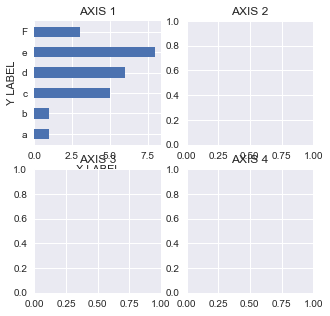

In [23]:
# PLOT PARAMETER OBJECTS
bar_p_l = [0,1,2,3,4,5]                   # positions of bars list
bar_h_l = [1,1,5,6,8,3]                   # Heights of bars list
bar_w_v = 0.5                             # bar width number saved as a variable
tick_p_l = [0,1,2,3,4,5]                  # Positions of ticks list
tick_l_l = ['a', 'b', 'c', 'd', 'e', 'F'] # Lables for x ticks

# MAKING FIGURE AND AXIS
fig = plt.figure( figsize=(5,5) )       # makes figure and set size (width,height) increase so that you can see text!
ax1 = fig.add_subplot(2,2,1)            # (rows, columns, plot number)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# ADDING INFO TO EACH AXIS
ax1.barh( bar_p_l, bar_h_l, bar_w_v )   # tells python you are creating a bar chart with the given arguements
ax1.set_yticks(tick_p_l)                # Set's the positions of ticks
ax1.set_yticklabels(tick_l_l)           # Set's the labels for the ticks
ax1.set_title('AXIS 1')                 # label title 
ax1.set_xlabel('X LABEL')               # label x axis
ax1.set_ylabel('Y LABEL')               # LaBel y axis

ax2.set_title('AXIS 2')                 # label title

ax3.set_title('AXIS 3')                 # label title

ax4.set_title('AXIS 4')                 # label title 

# SHOW THE FIGURE
plt.show()                               # tells python you want to show the bar chart

### MULTIPLE PLOTS from a DataFrame with for loop

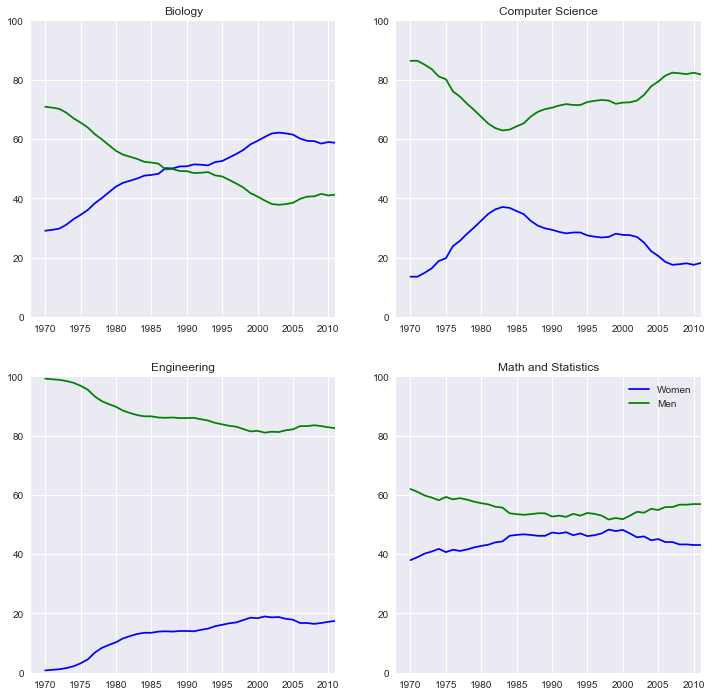

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees.head()

major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    
    ax.set_title(major_cats[sp])
    
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    
    ax.set_xlim( 1968,2011 )
    ax.set_ylim( 0,100 )
    
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
    ax.tick_params(bottom='off')
    ax.tick_params(left='off')
    # Add your code here.
    
# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

### Lineplots

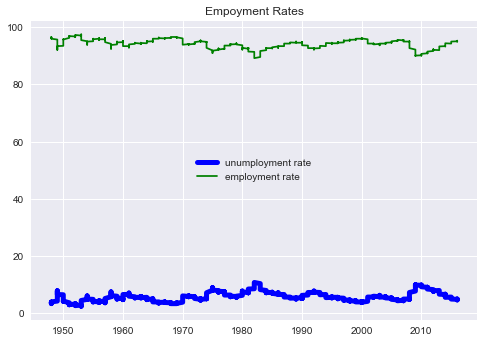

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = df_u2['year']
ax.set_title('Empoyment Rates')

y1 = df_u2['VALUE']

ax.plot( x,y1,
        c='blue',
        label='unumployment rate',
        linewidth=5)

y2 = 100 - df_u2['VALUE']
ax.plot( x,y2, c='green', label='employment rate' )

# Remove Spines
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Remove Ticks
ax.tick_params(bottom='off')

# remove loc parameter for smart automatic placing of legend.
ax.legend(loc='center')

fig.savefig("employment_rates.png")
plt.show()

### Interactive Line plots

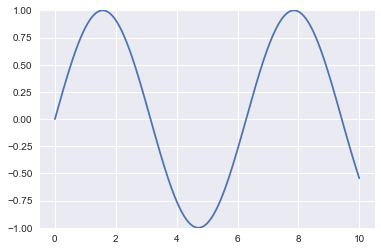

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.html.widgets import interact

def plot_sine(frequency=1.0, amplitude=1.0):
    plt.ylim(-1.0, 1.0);
    x = np.linspace(0, 10, 1000)
    plt.plot(x, amplitude*np.sin(x*frequency));

interact(plot_sine, frequency=(0.5, 10.0), amplitude=(0.0, 1.0));

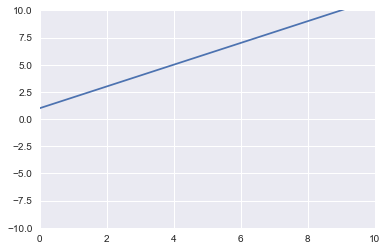

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.html.widgets import interact

def plot_x(m =1.0, c=1.0):
    plt.ylim(-10.0, 10.0);
    plt.xlim(0, 10.0);
    x = np.linspace(-10, 10, 20)
    plt.plot(x, (m*x)+c);

interact(plot_x, m=(-10.0, 10.0), c=(-10, 10));

### Colours RGB
![color](https://s3.amazonaws.com/dq-content/tableau_rgb_values.png)

In [28]:
blue_dark = (0/255,107/255,164/255)
blue_light = (162/255,200/255,236/255)
blue = (95/255,158/255,209/255)
brown = (200/255,82/255,0/255)
orange = (255/255,128/255,14/255)
orange_light = (255/255,188/255,121/255)
grey_dark1 = (137/255,137/255,137/255)
grey_dark2 = (89/255,89/255,89/255)
grey = (171/255,171/255,171/255)
grey_light = (207/255,207/255,207/255)

### Histograms With KDE (Seaborn)

C:\Users\jason\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


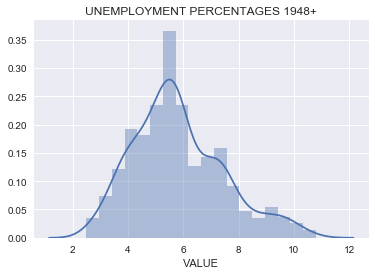

In [29]:
import seaborn as sns

sns.distplot(df_u2['VALUE'])

plt.title('UNEMPLOYMENT PERCENTAGES 1948+')
sns.despine(left = True, bottom=True)

plt.show()

### Kernel Density Plot only (seaborn)

###### Seaborn Styles

![Seaborn Styles](https://s3.amazonaws.com/dq-content/seaborn_all_styles.png)


C:\Users\jason\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


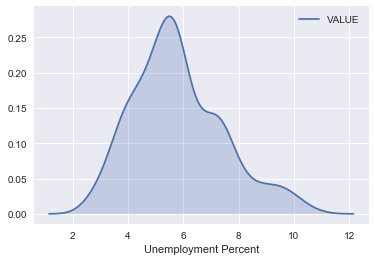

In [30]:
sns.kdeplot(df_u2['VALUE'],             # Generates KDE plot
            shade=True)                 # Shades under the graph


sns.set_style('whitegrid')              # Set's the background style
plt.xlabel("Unemployment Percent")      # Label the x axis
sns.despine(left=True, bottom=True)     # take away border lines (spines)


plt.show()                              # Show the plot

# Small Multiple (Grid Chart)

C:\Users\jason\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


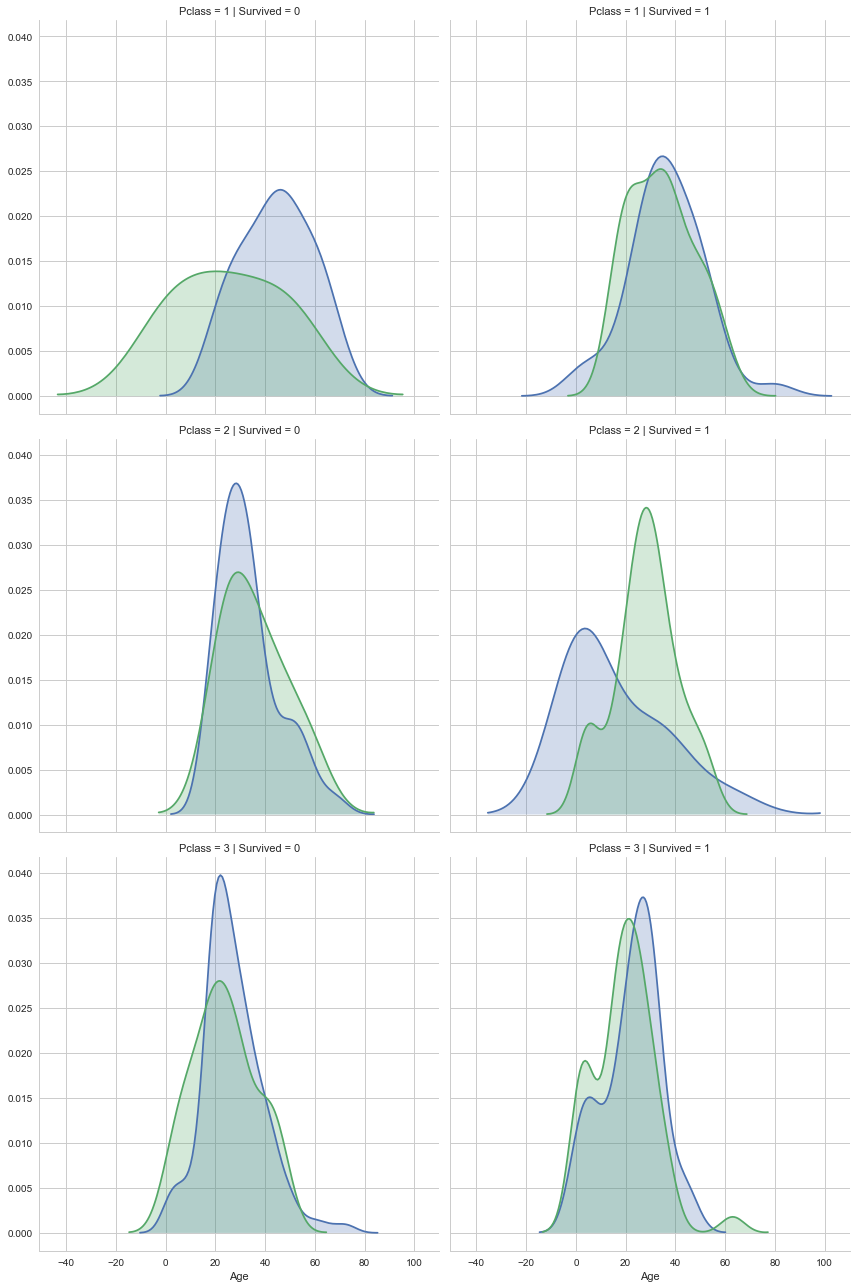

In [31]:
# Making DataFrame (ignore)
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = pd.read_csv('train.csv')
titanic = titanic[cols]
titanic = titanic.dropna()


g = sns.FacetGrid(titanic,          # Dataframe object
                  col="Survived",   # col gives us a plot for each possibility of 'Survived'
                  row="Pclass",     # row does a row for each row parameter
                  hue='Sex',        # colored plot for each possibility
                  size=6)           # Height 6inch per plot

g.map(sns.kdeplot,  # Type of plot
      "Age",        # parameter on the x-axis
      shade=True)   # Shade under plot?

# Functions

In [5]:
# Function to return a list of values in k for example [100000, 200000] -> ['100k', '200k']
'''
a = start value
b = end value
c = number of values
'''
def ks(start, end, tots):
    a = np.linspace(start, end , tots)
    b = []
    for x in a:
        x = x/1000
        x = int(x)
        x = str(x)
        x = x+'k'
        b.append(x)
    return b


In [7]:
ks(0, 15000, 16)

['0k',
 '1k',
 '2k',
 '3k',
 '4k',
 '5k',
 '6k',
 '7k',
 '8k',
 '9k',
 '10k',
 '11k',
 '12k',
 '13k',
 '14k',
 '15k']

In [7]:
# a = np.linspace(start, end , tots)
a = np.linspace(620000, 740000, 7)
a 

array([ 620000.,  640000.,  660000.,  680000.,  700000.,  720000.,  740000.])